# Dataset description

1. RowNumber          : ID for the rows </br >
2. CustomerId         : ID for the customer </br >
3. Surname            : Last name of the customer </br >
4. CreditScore        : Credit score for the customer </br >
5. Geography          : Location for the customer (France, Spain and Germany) </br >
6. Gender             : male/female </br >
7. Age                : Age of the customer </br >
8. Tenure             : Tenure </br >
9. Balance            : Acccount balance </br >
10. NumOfProducts      : How many accounts, bank account affiliated products the person has </br >
11. HasCrCard          : Does the customer have a credit card through the bank? </br >
12. IsActiveMember     : Subjective, but for the concept </br >
13. EstimatedSalary    : Salary </br >
14. Exited             : Did they leave the bank after all? </br >

# Steps
1. Import the libs
2. First look at the data <br />
    2.1. Drop columns with unique values
3. EDA <br />
    3.1. Univariate analysis for categorical columns <br />
    3.2. Pair plot analysis <br />
    3.3. Heat map analysis <br />
4. Split Data
5. Normalize/Standardize data
6. Model building <br />
    6.1. Build a linear model <br />
    6.2. Build a ensemble model <br />
    6.3. Build a neural network model <br />
    6.4. Compare and contrast <br />
    6.5. Build confusion matrix and print accuracy scores <br />
7. Improvements considerations <br />
    7.1. Handle imbalance <br />
    7.2. Hyper parameter tuning

# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# First look at the data

In [3]:
# BASE_PATH = "/content/drive/My Drive/Colab Notebooks/project 6 nueral net/"
BASE_PATH=""
file_name = "bank.csv"
data = pd.read_csv(BASE_PATH + file_name)
print(f"The given dataset contains {data.shape[0]} rows and {data.shape[1]} columns")
print(f"The given dataset contains {data.isna().sum().sum()} Null value")

The given dataset contains 10000 rows and 14 columns
The given dataset contains 0 Null value


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Observations
1. There are no null/nan values in the dataset
2. Columns 'RowNumber', 'CustomerId', 'Surname' bring no actual information and thus they can be removed

## Drop columns with unique values

In [6]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


# EDA

In [8]:
# separate features into categorical, numerical and target
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
target = 'Exited'

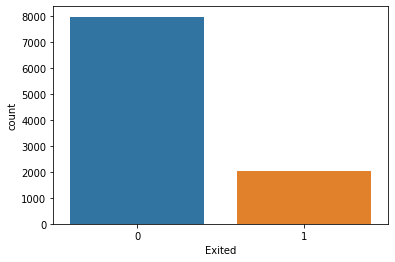

In [9]:
sns.countplot(data=data, x=target);

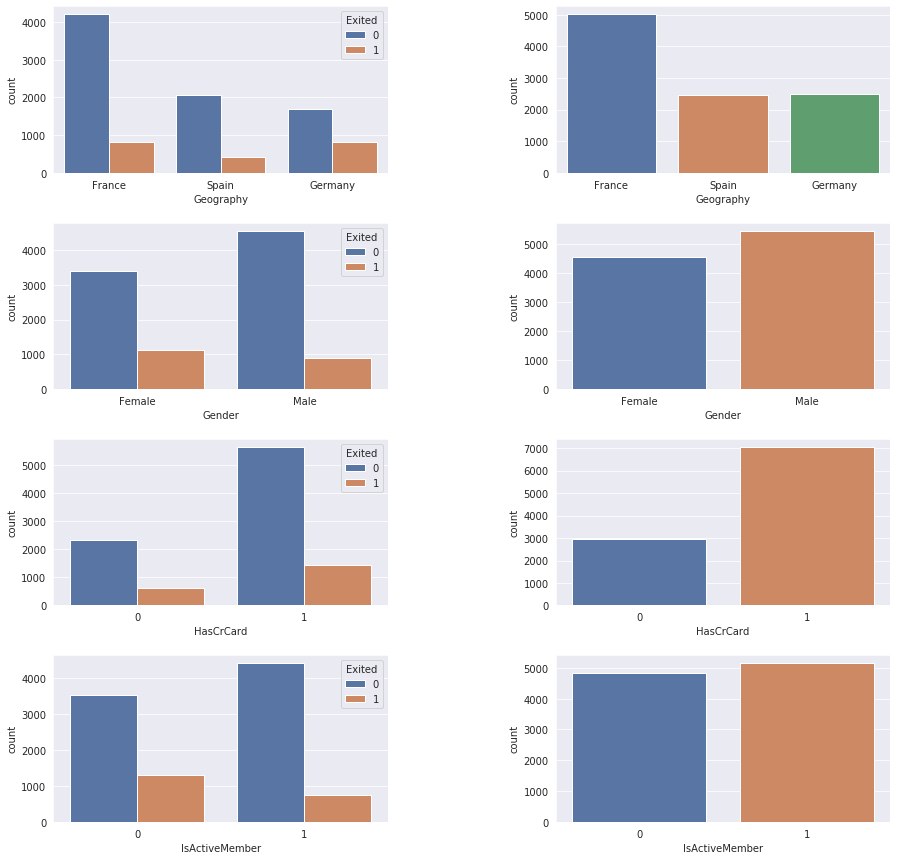

In [10]:
plt.figure(figsize=(15, 15))
sns.set_style("darkgrid")
count = 1
for col in cat_cols:
    plt.subplots_adjust(hspace=0.3, wspace=0.5)
    plt.subplot(4, 2, count)
    sns.countplot(data=data, x=col, hue=target, palette='deep')
    count += 1
    plt.subplot(4, 2, count)
    sns.countplot(data=data, x=col, palette='deep')
    count += 1

#### Observations
1. The provided dataset is biased towards the outcome 0. This means we might need to use stratified sampling or imbalance handling
2. The dataset contains data from France the most
3. Data contains more slighly more male data than female
4. In the dataset, more customers have credit cards then not
5. Dataset have more or less same number of active and inactive customers

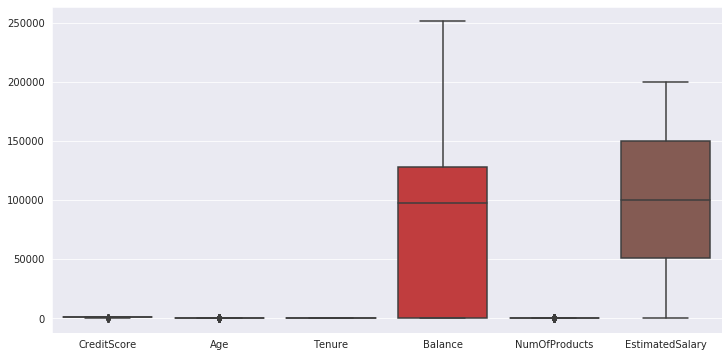

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[num_cols])

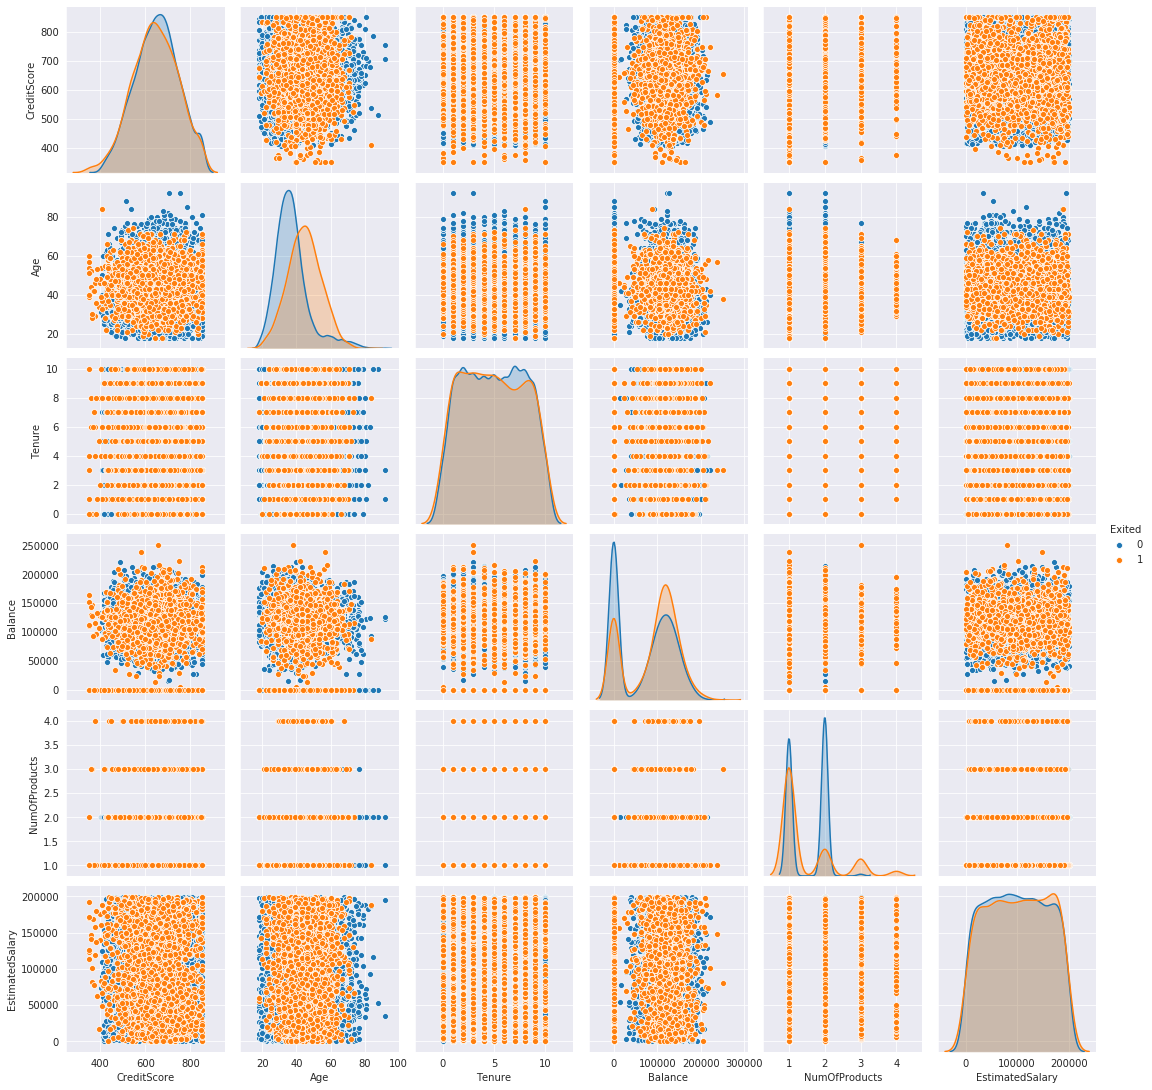

In [12]:
sns.pairplot(data[num_cols + [target]], hue=target, diag_kind='kde');

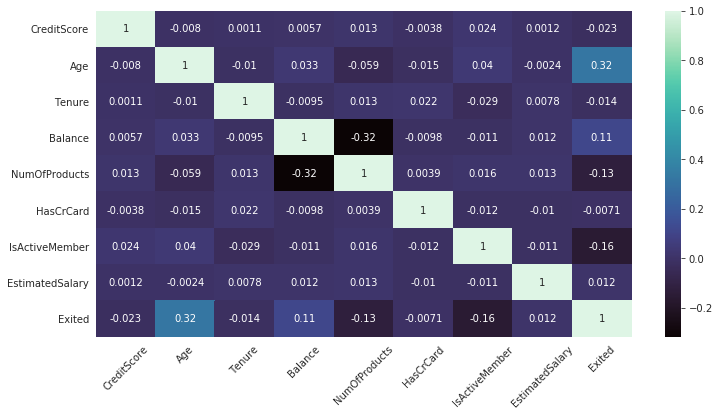

In [13]:
plt.subplots(figsize=(12, 6))
corr = data.corr('spearman')

ax = sns.heatmap(data=corr, cmap='mako', annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observations

<b>Diagonal analysis</b> <br />
1. Credit Score data is normal for customers that exited and those that stayed
2. Age data is nearly normal with slight right tail for customers that stayed
3. Tenure data does not have tails but a lot of data is surrounded around mean
4. Balance appears to have 2 gaussians.
5. Estimated Salary is also centered around mean

<b> Off diagonal analysis</b>
1. Credit score does not have strong correlation with any of the attributes
2. Age has a slight correlation with target variable
3. Balance has slight correlation with number of products
4. No other correlation is observed

# Splitting and normalizing the data

In [14]:
for col in ['Geography', 'Gender']:
    data = pd.concat([data.drop(col, axis=1), pd.get_dummies(data[col], prefix=col, drop_first=True)], axis=1)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('Exited', axis=1)
y = data.Exited.values

X = StandardScaler().fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=data.Exited)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

# Model building

## Linear model

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train)}")
print(f"Test score: {lr.score(X_test, y_test)}")

Training score: 0.811375
Test score: 0.809


## Ensemble model

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

print(f"Training score: {gbc.score(X_train, y_train)}")
print(f"Test score: {gbc.score(X_test, y_test)}")

Training score: 0.8755
Test score: 0.864


## Neural network

<b>Hyper parameter selection</b>

Number of hidden layers = 2 <br />
Number of neurons per layers: 10 (less than X_train.shape[1]) in the first layer, 6 (randomly selected value) in second layer<br />
Dropouts: 0.1 (Neural network regularization)<br />
Activation function for hidden layers: relu<br />
Activation function for output layer: sigmoid<br />
loss function: binary_crossentropy (since target feature is binary) <br />
optimizer function: adam (most common) <br />
metrics: accuracty<br />

In [19]:
# Import tensorflow/keras libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers

# Build neural network
model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1], )))
model.add(Dropout(0.1))
model.add(Dense(6, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

# Summarize the model
#model.summary()

In [20]:
# Train the neural netowrk model
model.fit(X_train, y_train, epochs=100, batch_size=256, verbose=2, validation_split=0.1) 

Train on 7200 samples, validate on 800 samples
Epoch 1/100
7200/7200 - 0s - loss: 0.7061 - accuracy: 0.5374 - val_loss: 0.6084 - val_accuracy: 0.6762
Epoch 2/100
7200/7200 - 0s - loss: 0.6050 - accuracy: 0.6736 - val_loss: 0.5494 - val_accuracy: 0.7663
Epoch 3/100
7200/7200 - 0s - loss: 0.5620 - accuracy: 0.7236 - val_loss: 0.5203 - val_accuracy: 0.7850
Epoch 4/100
7200/7200 - 0s - loss: 0.5384 - accuracy: 0.7422 - val_loss: 0.5009 - val_accuracy: 0.7962
Epoch 5/100
7200/7200 - 0s - loss: 0.5204 - accuracy: 0.7560 - val_loss: 0.4879 - val_accuracy: 0.7950
Epoch 6/100
7200/7200 - 0s - loss: 0.5111 - accuracy: 0.7615 - val_loss: 0.4778 - val_accuracy: 0.7950
Epoch 7/100
7200/7200 - 0s - loss: 0.5030 - accuracy: 0.7697 - val_loss: 0.4691 - val_accuracy: 0.7962
Epoch 8/100
7200/7200 - 0s - loss: 0.4881 - accuracy: 0.7719 - val_loss: 0.4622 - val_accuracy: 0.7962
Epoch 9/100
7200/7200 - 0s - loss: 0.4849 - accuracy: 0.7756 - val_loss: 0.4565 - val_accuracy: 0.7962
Epoch 10/100
7200/7200 - 0

In [21]:
from sklearn import metrics

def evaluate_model(model, X_train, X_test, y_train, y_test, threshold=0.5):
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print('Accuracy: %.3f'  % acc)
    print('Loss: %.3f' % loss)
    y_predict = model.predict(X_test)
    y_pred = []
    for val in y_predict:
        y_pred.append(1 if val >= threshold else 0)
    cm = metrics.confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt='d', cmap='mako')
    print (((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')
    print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.846
Loss: 0.362
84.6 % of testing data was classified correctly
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.74      0.37      0.50       407

    accuracy                           0.85      2000
   macro avg       0.80      0.67      0.70      2000
weighted avg       0.83      0.85      0.83      2000



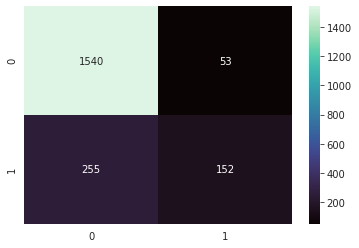

In [22]:
evaluate_model(model, X_train, X_test, y_train, y_test)

#### Observations
1. Based on the accuracy scores, neural network performs similar to gradient boosting
2. Around 85% of the predictions are correct
3. Recall rate is low. We might need to consider strategies like Grid Search, imbalance handling to improve it.

# Improvements Considerations

## Over sampling

In [23]:
from imblearn.over_sampling import SMOTE

oversampling = SMOTE()
X_oversampled, y_oversampled = oversampling.fit_resample(X, y)
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.20, random_state=1)
X_train_oversampled.shape, X_test_oversampled.shape, y_train_oversampled.shape, y_test_oversampled.shape

((12740, 11), (3186, 11), (12740,), (3186,))

Accuracy: 0.673
Loss: 0.632
67.29441305712493 % of testing data was classified correctly
              precision    recall  f1-score   support

           0       0.60      0.97      0.74      1534
           1       0.93      0.40      0.56      1652

    accuracy                           0.67      3186
   macro avg       0.77      0.68      0.65      3186
weighted avg       0.77      0.67      0.65      3186



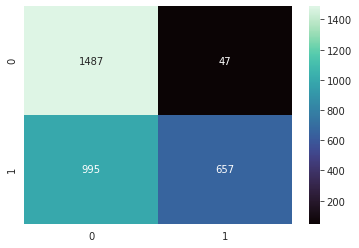

In [24]:
evaluate_model(model, X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled)

#### Observations
1. Oversampling the data improved recall slightly but caused precision and f1 score to fall drastically.
2. Thus oversampling is clearly not the right approach

## Hyper parameter tuning

In [25]:
optimizer_algo = [optimizers.SGD, optimizers.RMSprop, optimizers.Adam, optimizers.Adamax, optimizers.Nadam]
learn_rate = [0.001, 0.01, 0.1, 0.2]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
batch_size = [100, 200]
epochs = [50, 100]

# Below are some other parameter that can be tuned but since the runtime takes too long, we will only tune the above parameters only
#init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
#activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#neurons = [1, 5, 10, 15, 20, 25, 30]

param_grid = dict(optimizer_algo=optimizer_algo, 
                 learn_rate=learn_rate, 
                 momentum=momentum)

In [26]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import optimizers

def build_model(optimizer_algo=optimizers.Adam, learn_rate=0.01, activation='relu', dropout_rate=0.1, momentum=0):
    model = Sequential()
    model.add(Dense(11, activation=activation, input_shape=(X_train.shape[1], )))
    model.add(Dropout(dropout_rate))
    model.add(Dense(6, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer_algo(learning_rate=learn_rate, momentum=momentum), 
                  metrics=['accuracy'])
    return model
classifier = KerasClassifier(build_fn=build_model, verbose=0)

In [27]:
grid = GridSearchCV(estimator=classifier, param_grid=param_grid, n_jobs=-1, cv=3, verbose=2)

In [28]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   52.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2f705d5ad0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'learn_rate': [0.001, 0.01, 0.1, 0.2],
                         'momentum': [0.0, 0.2, 0.4, 0.6, 0.8, 0.9],
                         'optimizer_algo': [<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>,
                                            <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>,
                                            <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>,
                                            <class 'tensorflow.python.keras.optimizer_v2.adamax.Adamax'>,
                                            <class 'tensorflow.python.keras.optimizer_v2.nadam.Nadam'>]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [29]:
grid.best_params_

{'learn_rate': 0.01,
 'momentum': 0.4,
 'optimizer_algo': tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop}

In [30]:
grid.score(X_test, y_test)

0.846

84.6 % of testing data was classified correctly
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.74      0.37      0.50       407

    accuracy                           0.85      2000
   macro avg       0.80      0.67      0.70      2000
weighted avg       0.83      0.85      0.83      2000



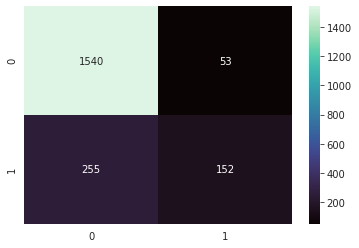

In [31]:
y_predict = model.predict(X_test)
y_pred = []
for val in y_predict:
    y_pred.append(1 if val >= 0.5 else 0)
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d', cmap='mako')
print (((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')
print(metrics.classification_report(y_test,y_pred))

#### Observations
1. Grid search also does not show any improvements
2. We see that according to grid search, the best optimizer is RMSprop but it provides more or less same results as Adam

# Conclusion

Based on the above study of data, below are the conclusions we can make

1. We can predict 85% churn rate
2. ANN and Gradient boosting predictions are similar in this case
3. ANN performs better than linear algorithms
3. Threshold of 0.5 is used for predictions classification (method=evaluate_model)